### Drive Mount, Libraries and Reproducibility

In [ ]:
#@title Drive Mount

import os
Running_On_COLAB = True #@param {type:'boolean'}
if Running_On_COLAB:
  from google.colab import drive
  drive.mount('/gdrive')
  general_path="/gdrive/MyDrive/Assignment"
  current_path=os.path.join(general_path,"FromScratch")
  %cd /gdrive/MyDrive/Assignment
else:
  # ON PC (Windows) will run instead of the above
  %cd "I:/Il mio Drive/Assignment"
  general_path="I:/Il mio Drive/Assignment"
  current_path=general_path

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1lbwLgXuDnIZzcU31iWDOKo7YxctY6mF-/Assignment


In [ ]:
#@title Main libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
#@title Reproducibility
# Setting a seed for reproducibility
import os
import random

seed = 90 
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print("The seed is: " + str(seed))

The seed is: 90


In [ ]:
dataset_dir = os.path.join(general_path,'OriginalDataset/splitted_dataset')
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

### Dials and nobs. 

In [ ]:
#@title Hyperparameters Dictionary

#@markdown Here we can manually set epochs number, patience, batch_size, learning_rate, ...
#@markdown simulation hyperparameters
hyperparameters={}
hyperparameters['epochs']= 200 #@param  
hyperparameters['patience']= 50 #@param 
hyperparameters['batch_size']= 64 #@param

hyperparameters['learning_rate']= 10**-3 #@param 
hyperparameters['monitored_value']= 'val_accuracy' #@param
hyperparameters['monitoring_mode']= 'max'#@param

#@markdown Images preparation
hyperparameters['input_shape_height']= 1024 #@param
hyperparameters['input_shape_width']= 1024 #@param

hyperparameters['resized_shape_height']= 100 #@param
hyperparameters['resized_shape_width']= 100 #@param

#@markdown Feed Forward Neural Network From Scratch
hyperparameters['model_cool_name']= 'FromScratchWithClassWeights' #@param
hyperparameters['activation_function_1']= 'relu' #@param activation function of the first layer
hyperparameters['activation_function_2']= 'relu' #@param activation function of the second layer
hyperparameters['activation_function_3']= 'relu' #@param activation function of the third layer
hyperparameters['output_shape']= 3 #@param number of classes

In [ ]:
hyperparameters

{'epochs': 200,
 'patience': 50,
 'batch_size': 64,
 'learning_rate': 0.001,
 'monitored_value': 'val_accuracy',
 'monitoring_mode': 'max',
 'input_shape_height': 1024,
 'input_shape_width': 1024,
 'resized_shape_height': 100,
 'resized_shape_width': 100,
 'model_cool_name': 'FromScratchWithClassWeights',
 'activation_function_1': 'relu',
 'activation_function_2': 'relu',
 'activation_function_3': 'relu',
 'output_shape': 3}

In [ ]:
# This function is used to create a dictionary with the hyperparameters of the augmentation 
def get_augmentation_hyperparameters(selected_dictionary):
  
  if selected_dictionary==0:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Basic_Augmentation'
    augmentation_hyperparameters['rotation_range']= 45
    augmentation_hyperparameters['width_shift_range']= 0
    augmentation_hyperparameters['height_shift_range']= 0
    augmentation_hyperparameters['brightness_range']= [0.8, 1.2]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.7, 1.2]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0
    
  elif selected_dictionary==1:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Aggressive_Augmentation'
    augmentation_hyperparameters['rotation_range']= 90
    augmentation_hyperparameters['width_shift_range']= 0.2
    augmentation_hyperparameters['height_shift_range']= 0.2
    augmentation_hyperparameters['brightness_range']= [0.5, 1.5]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.5, 1.5]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0

  elif selected_dictionary==2:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Kind_Augmentation'
    augmentation_hyperparameters['rotation_range']= 0
    augmentation_hyperparameters['width_shift_range']= 0.1
    augmentation_hyperparameters['height_shift_range']= 0.1
    augmentation_hyperparameters['brightness_range']=  [0.9, 1.1]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.9, 1.1]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0
  
  return augmentation_hyperparameters

##### Augmentation

In [ ]:
#Augmentation

dictionary = get_augmentation_hyperparameters(2)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug_train_gen = ImageDataGenerator(
    rotation_range = dictionary['rotation_range'],
    height_shift_range = dictionary['height_shift_range'],
    width_shift_range = dictionary['width_shift_range'], 
    zoom_range = dictionary['zoom_range'],
    horizontal_flip = dictionary['horizontal_flip'],
    vertical_flip = dictionary['vertical_flip'], 
    fill_mode = dictionary['fill_mode'],
    cval = dictionary['cval'],
    rescale = dictionary['rescale_range'],
    brightness_range = dictionary['brightness_range'],
    #preprocessing_function= preprocess_input)
)

aug_training_set = aug_train_gen.flow_from_directory(directory = training_dir,
                                                  target_size = (hyperparameters['resized_shape_height'], hyperparameters['resized_shape_width']),
                                                  color_mode = 'grayscale',
                                                  classes = None, 
                                                  class_mode = 'categorical',
                                                  batch_size = hyperparameters['batch_size'],
                                                  shuffle = True,
                                                  seed = seed)

noaug_training_set = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = training_dir,
                                                                              target_size = (hyperparameters['resized_shape_height'], hyperparameters['resized_shape_width']),
                                                                              color_mode = 'grayscale',
                                                                              classes = None, 
                                                                              class_mode = 'categorical',
                                                                              batch_size = hyperparameters['batch_size'],
                                                                              shuffle = True,
                                                                              seed = seed)

noaug_validation_set = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = validation_dir,
                                                                target_size = (hyperparameters['resized_shape_height'], hyperparameters['resized_shape_width']),
                                                                color_mode = 'grayscale',
                                                                classes = None, 
                                                                class_mode = 'categorical',
                                                                batch_size = hyperparameters['batch_size'],
                                                                shuffle = True,
                                                                seed = seed)
test_set = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = test_dir,
                                                                target_size = (hyperparameters['resized_shape_height'], hyperparameters['resized_shape_width']),
                                                                color_mode = 'grayscale',
                                                                classes = None, 
                                                                class_mode = 'categorical',
                                                                batch_size = hyperparameters['batch_size'],
                                                                shuffle = True,
                                                                seed = seed)


KeyboardInterrupt: ignored

In [ ]:
labels = {
    0 : 'Normal',
    1 : 'Pneumonia',
    2 : 'Tubercolosis',
    }

In [ ]:
def get_next_batch(generator, image_index=0): #function to take one batch from generator, to take an image we consider first element of the batch
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)


  # Visualize only the first sample
  image = image[image_index]
  target = target[image_index]
  target_idx = np.argmax(target)
  
  idx = (generator.batch_index -1) * generator.batch_size
  print(generator.filenames[idx : idx + generator.batch_size][image_index])
  
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  image_2_show = image[:,:,0]
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.double(image_2_show),cmap='gray')

  return batch, image_2_show, target

In [ ]:
_ = get_next_batch(aug_training_set)

# FromScratch model creation

In [ ]:
def scratch_model(hyparams, seed):

    input_layer = tfkl.Input(shape=(hyparams['resized_shape_height'],hyparams['resized_shape_width'],1), name='input_layer')

    conv1 = tfkl.Conv2D(
        filters=32,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D()(conv1)

    conv2 = tfkl.Conv2D(
        filters=64,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D()(conv2)

    conv3 = tfkl.Conv2D(
        filters=128,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D()(conv3)

    conv4 = tfkl.Conv2D(
        filters=256,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)
    pool4 = tfkl.MaxPooling2D()(conv4)

    conv5 = tfkl.Conv2D(
        filters=512,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool4)
    pool5 = tfkl.MaxPooling2D()(conv5)

    flattening_layer = tfkl.Flatten(name='Flatten')(pool5)
    dropout = tfkl.Dropout(0.3, seed=seed)(flattening_layer)
    classifier_layer = tfkl.Dense(units=512, name='Classifier', kernel_initializer=tfk.initializers.HeUniform(seed), activation='relu')(dropout)
    dropout = tfkl.Dropout(0.3, seed=seed)(classifier_layer)
    output_layer = tfkl.Dense(units=3, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='output_layer')(dropout)

    # input→output
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile and return
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    return model

In [ ]:
model = scratch_model(hyperparameters,seed)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 20.2 MB/s eta 0:00:00


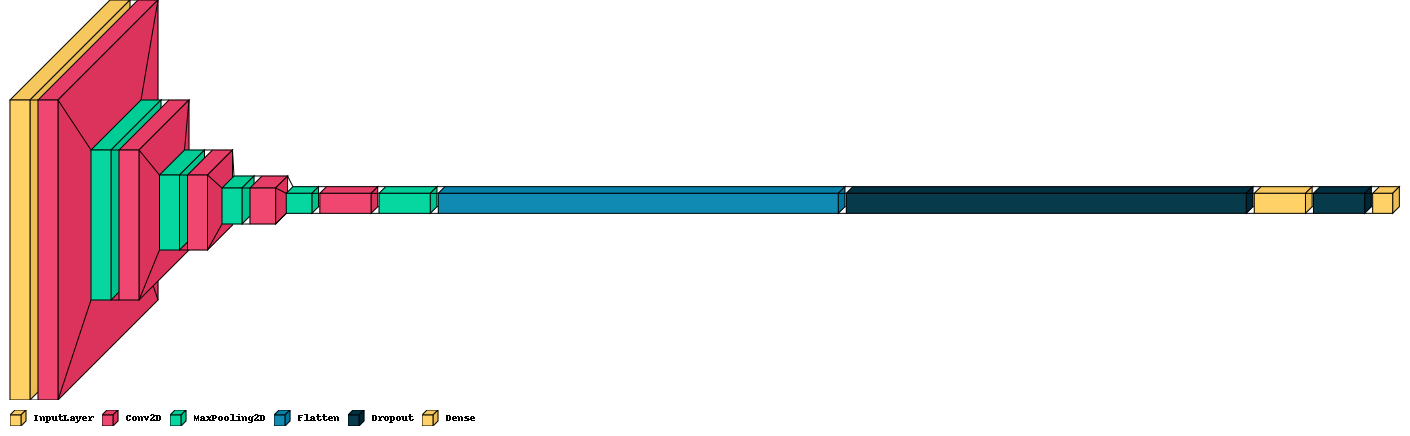

In [ ]:
# Download and import visualkeras library
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model, legend=True, spacing=8, scale_xy=3)

# Training

In [ ]:
#callbacks
from datetime import datetime
def create_folders_and_callbacks(model_name):
    if Running_On_COLAB:
        exps_dir = os.path.join('/gdrive/My Drive/Assignment/Experiments',model_name)
    else:
        exps_dir = os.path.join(current_path,'Experiments',model_name)

    print("Model will be saved in: " + str(exps_dir))
    if not os.path.exists(exps_dir):
        os.makedirs(exps_dir)

    now = datetime.now().strftime('%b%d_%H-%M-%S')

    exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
    if not os.path.exists(exp_dir):
        os.makedirs(exp_dir)
      
    callbacks = []

    # Model checkpoint
    # ----------------
    ckpt_dir = os.path.join(exp_dir, 'ckpts')
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=True, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
    callbacks.append(ckpt_callback)

    # Visualize Learning on Tensorboard (platform that allows to visualize experiments)
    # ---------------------------------
    tb_dir = os.path.join(exp_dir, 'tb_logs')
    if not os.path.exists(tb_dir):
        os.makedirs(tb_dir)
      
    # By default shows losses and metrics for both training and validation
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
    callbacks.append(tb_callback)

    # Early Stopping
    # --------------
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=hyperparameters['patience'], restore_best_weights=True)
    callbacks.append(es_callback)

    return callbacks

In [ ]:
hyperparameters['model_cool_name']

'FromScratchWithClassWeights'

In [ ]:
aug_callbacks = create_folders_and_callbacks(model_name=hyperparameters['model_cool_name'])

Model will be saved in: /gdrive/My Drive/Assignment/Experiments/FromScratchWithClassWeights


In [ ]:
#@title Compute Class Weights
from sklearn.utils import class_weight

weights = class_weight.compute_class_weight(class_weight= 'balanced', classes = np.unique(aug_training_set.classes), y = aug_training_set.classes)
class_weight_dict = dict(enumerate(weights))

In [ ]:
history = model.fit(
    x = aug_training_set,
    epochs = hyperparameters['epochs'],
    validation_data = noaug_validation_set,
    callbacks = aug_callbacks,
    batch_size = hyperparameters['batch_size'],
    class_weight = class_weight_dict
).history

Epoch 1/200
174/174 [==============================] - 631s 4s/step - loss: 1.0102 - accuracy: 0.5488 - val_loss: 0.8079 - val_accuracy: 0.5938
Epoch 2/200
174/174 [==============================] - 154s 886ms/step - loss: 0.5999 - accuracy: 0.6875 - val_loss: 0.6001 - val_accuracy: 0.7127
Epoch 3/200
174/174 [==============================] - 141s 811ms/step - loss: 0.4998 - accuracy: 0.7446 - val_loss: 0.5225 - val_accuracy: 0.7797
Epoch 4/200
174/174 [==============================] - 137s 791ms/step - loss: 0.4471 - accuracy: 0.7734 - val_loss: 0.3638 - val_accuracy: 0.8579
Epoch 5/200
174/174 [==============================] - 136s 783ms/step - loss: 0.4017 - accuracy: 0.8073 - val_loss: 0.4945 - val_accuracy: 0.7590
Epoch 6/200
174/174 [==============================] - 135s 777ms/step - loss: 0.3871 - accuracy: 0.8180 - val_loss: 0.3384 - val_accuracy: 0.8611
Epoch 7/200
174/174 [==============================] - 133s 767ms/step - loss: 0.3609 - accuracy: 0.8400 - val_loss: 0.36

# Saving model

In [ ]:
[val_loss, val_accuracy] = model.evaluate(noaug_validation_set)

20/20 [==============================] - 12s 596ms/step - loss: 0.1610 - accuracy: 0.9465


In [ ]:
[test_loss, test_accuracy] = model.evaluate(test_set)

In [ ]:
val_res = str(val_accuracy)

In [ ]:
hyperparameters['model_cool_name']

In [ ]:
model.save("FromScratch/Archive/"+hyperparameters['model_cool_name'])

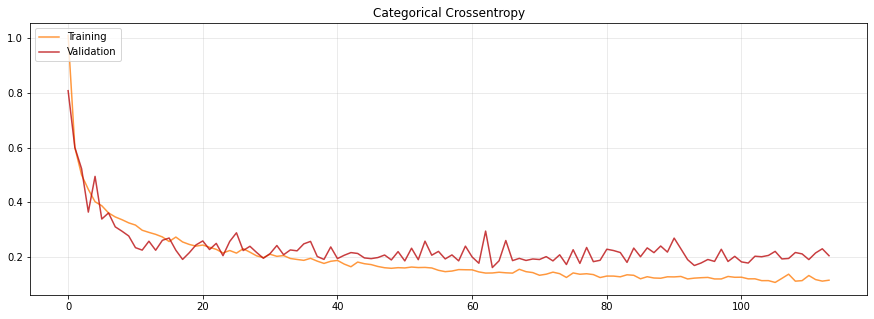

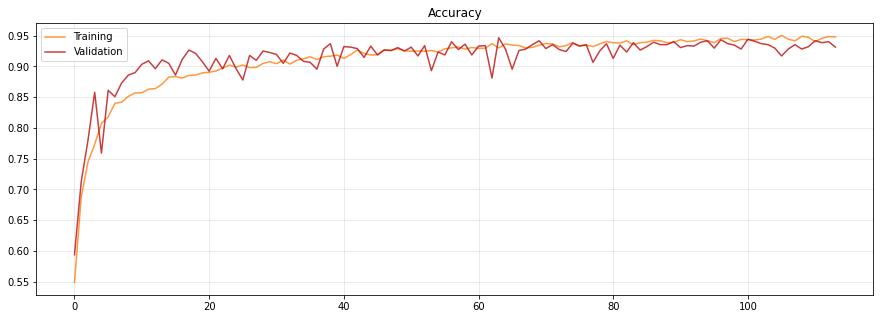

In [ ]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#BB0D10')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#BB0D10')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

##### Archive model

In [ ]:
results = {'test_loss' : test_loss, 'test_accuracy' : test_accuracy, 'val_loss': val_loss, 'val_accuracy' : val_accuracy}
model_settings_and_results = {**hyperparameters, **results}
model_settings_and_results

{'epochs': 200,
 'patience': 50,
 'batch_size': 64,
 'learning_rate': 0.001,
 'monitored_value': 'val_accuracy',
 'monitoring_mode': 'max',
 'input_shape_height': 1024,
 'input_shape_width': 1024,
 'resized_shape_height': 100,
 'resized_shape_width': 100,
 'model_cool_name': 'FromScratchWithClassWeights',
 'activation_function_1': 'relu',
 'activation_function_2': 'relu',
 'activation_function_3': 'relu',
 'output_shape': 3,
 'test_loss': 0.1903366893529892,
 'test_accuracy': 0.9372777342796326,
 'val_loss': 0.1610475331544876,
 'val_accuracy': 0.9465283155441284}

# Restore from last checkpoint

In [ ]:
model = scratch_model(hyperparameters,seed)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 128)       73856 

In [ ]:
# Restore the model from the latest checkpoint

latest = tf.train.latest_checkpoint("Experiments/FromScratchWithClassWeights/FromScratchWithClassWeights_Jan02_18-29-54/ckpts")
print(latest)
model.load_weights(latest)

# Use the restored model and evaluate performances
[val_loss, val_accuracy] = model.evaluate(noaug_validation_set)

In [ ]:
[test_loss,test_accuracy] = model.evaluate(test_set)

# Metrics Evaluation

In [ ]:
test_set_no_shuffle = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = test_dir,
                                                                target_size = (hyperparameters['resized_shape_height'], hyperparameters['resized_shape_width']),
                                                                color_mode = 'grayscale',
                                                                classes = None, 
                                                                class_mode = 'categorical',
                                                                batch_size = hyperparameters['batch_size'],
                                                                shuffle = False,
                                                                seed = seed)

Found 3093 images belonging to 3 classes.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

predictions = model.predict_generator(test_set_no_shuffle)
predicted_classes = np.argmax(predictions, axis=1)


<ipython-input-26-f39611d8b411>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_set_no_shuffle)


In [ ]:
np.save('/gdrive/MyDrive/AI project/models/predictions_FromScratchWithClassWeights.npy', predictions) 
#predictions = np.load('/content/gdrive/MyDrive/AI project/models/predictions_FromScratchWithClassWeights.npy')

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_set_no_shuffle.classes, predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Accuracy: 0.9344
Precision: 0.889
Recall: 0.9375
F1: 0.9093


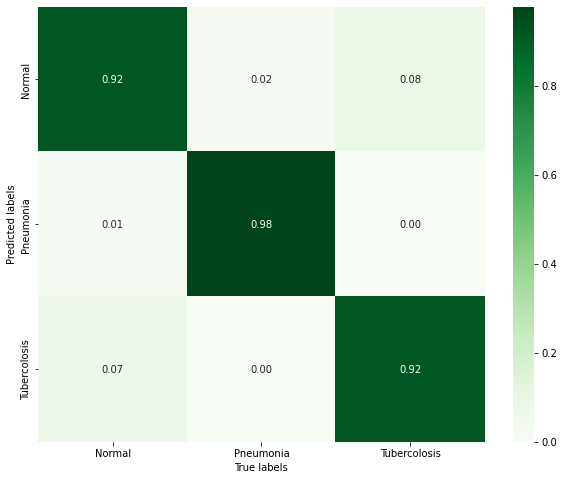

In [ ]:
# Compute the classification metrics
accuracy = accuracy_score(test_set_no_shuffle.classes, predicted_classes)
precision = precision_score(test_set_no_shuffle.classes, predicted_classes, average='macro')
recall = recall_score(test_set_no_shuffle.classes, predicted_classes, average='macro')
f1 = f1_score(test_set_no_shuffle.classes, predicted_classes, average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))

sns.heatmap(cm.T, xticklabels= labels.values(), yticklabels=labels.values(),cmap="Greens", annot=True, fmt='.2f')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_set_no_shuffle.classes, predicted_classes, target_names = labels.values()))

              precision    recall  f1-score   support

      Normal       0.97      0.92      0.95      1883
   Pneumonia       0.97      0.98      0.97       839
Tubercolosis       0.73      0.92      0.81       371

    accuracy                           0.93      3093
   macro avg       0.89      0.94      0.91      3093
weighted avg       0.94      0.93      0.94      3093

